## pandas / Numpy
판다스와 넘파이는 고급 데이터 분석과 수치계산등의 기능을 제공하는 확장 모듈 
넘파이는 수치계산을 효율적으로 하기 위한 모듈로 다차원 배열과 고수준의 수학 함수를 제공.
판다스는 테이블 분석기능을 제공하는 라이브러리 

## dataFrame
pandas 에서 사용하는 기본 데이터
데이터 프레임을 정의할 때는 2차원 리스트를 매개변수로 전달

In [3]:
### pandas를 이용하여 Dataframe 만들기 

In [4]:
import pandas as pd

In [8]:
#List 로 데이터 프레임 만들기
df = pd.DataFrame( [
 
    [10,20,30],
    [40,50,60],
    [70,80,90]
])
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [9]:
# 열 기준으로 추출하기
df.loc[:,0]

0    10
1    40
2    70
Name: 0, dtype: int64

In [11]:
# 행 기쥰으로 추출하기 
df.loc[0,:]

0    10
1    20
2    30
Name: 0, dtype: int64

In [13]:
# 범위를 정해 열 기준으로 추출하기
df.loc[:,0:1]

,0,1
0,10,20
1,40,50
2,70,80


In [16]:
df.loc[:,range(0,2)]

,0,1
0,10,20
1,40,50
2,70,80


In [17]:
#특정 위치의 값만 추출
df.loc[1,1]

50

# Series
- 판다스에서 사용하는 기본 데이터
- 1차원 리스트를 매개변수로 사용

In [22]:
s = pd.Series([1.0,3.0,5.0,7.0,9.0])
s

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
dtype: float64

In [23]:
s[0]
s[0:3]

0    1.0
1    3.0
2    5.0
dtype: float64

# 딕셔너리로 데이터 프레임 만들기 

In [32]:
tbl = pd.DataFrame({
    "weight" : [80.0, 70.4, 65.5, 45.9, 51.2],
    "height" : [170, 180, 155, 143, 154],
    "type":['f','n','t','t','t']
})
tbl

,weight,height,type
0,80.0,170,f
1,70.4,180,n
2,65.5,155,t
3,45.9,143,t
4,51.2,154,t


In [34]:
# 몸무게 컬럼만 출력
tbl.loc[:,'weight']

0    80.0
1    70.4
2    65.5
3    45.9
4    51.2
Name: weight, dtype: float64

In [36]:
# 몸무게와 키 컬럼 출력
tbl.loc[:,['weight','height']]

,weight,height
0,80.0,170
1,70.4,180
2,65.5,155
3,45.9,143
4,51.2,154


In [37]:
# 2~3 행 출력
tbl.loc[2:3,]

,weight,height,type
2,65.5,155,t
3,45.9,143,t


In [39]:
# 3행 이후 모두 출력
tbl.loc[3:,:]

,weight,height,type
3,45.9,143,t
4,51.2,154,t


###행과 열기준이 아닌 데이터를 비교하여 원하는 값 추출

In [42]:
# 키가 160 이상인 데이터 출력하기
tbl.height>=160
tbl[tbl.height>=160]

,weight,height,type
0,80.0,170,f
1,70.4,180,n


In [45]:
# 타입이 n 인것만 출력하기 
tbl.type=='n'
tbl[tbl.type=='n']

,weight,height,type
1,70.4,180,n


### 정렬의 오름차순과 내림차순 

In [48]:
# height 기준으로 오름차순
tbl.sort_values(by='height')

,weight,height,type
3,45.9,143,t
4,51.2,154,t
2,65.5,155,t
0,80.0,170,f
1,70.4,180,n


In [50]:
#내림차순

tbl.sort_values(by = "height", ascending =False)

,weight,height,type
1,70.4,180,n
0,80.0,170,f
2,65.5,155,t
4,51.2,154,t
3,45.9,143,t


In [53]:
import matplotlib.pylab as plt 
%matplotlib inline

In [54]:
# 데이터 불러오기 
names = pd.read_csv("../Data/Baby_Names_1880-2014.csv")

In [55]:
# 앞에서 5개만 보기
names.head()

,name,gender,births,year,id
0,Mary,F,7065,1880,1
1,Anna,F,2604,1880,2
2,Emma,F,2003,1880,3
3,Elizabeth,F,1939,1880,4
4,Minnie,F,1746,1880,5


In [56]:
names.tail()

,name,gender,births,year,id
1825383,Zykeem,M,5,2014,13973
1825384,Zymeer,M,5,2014,13974
1825385,Zymiere,M,5,2014,13975
1825386,Zyran,M,5,2014,13976
1825387,Zyrin,M,5,2014,13977


In [58]:
names.head()

,name,gender,births,year,id
0,Mary,F,7065,1880,1
1,Anna,F,2604,1880,2
2,Emma,F,2003,1880,3
3,Elizabeth,F,1939,1880,4
4,Minnie,F,1746,1880,5


In [59]:
# 전체갯수 
names.count()

name      1825388
gender    1825388
births    1825388
year      1825388
id        1825388
dtype: int64

In [60]:
# 컬럼 하나의 갯수
names.name.count()

1825388

In [63]:
# 피봇을 이용하여 각 이름의 카운트를 년도별 합계로 그룹화하여 집꼐하기 

total_births = names.pivot_table('births', index = 'year', columns="gender", aggfunc=sum)

In [70]:
total_births.head(10)

gender,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113683
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853


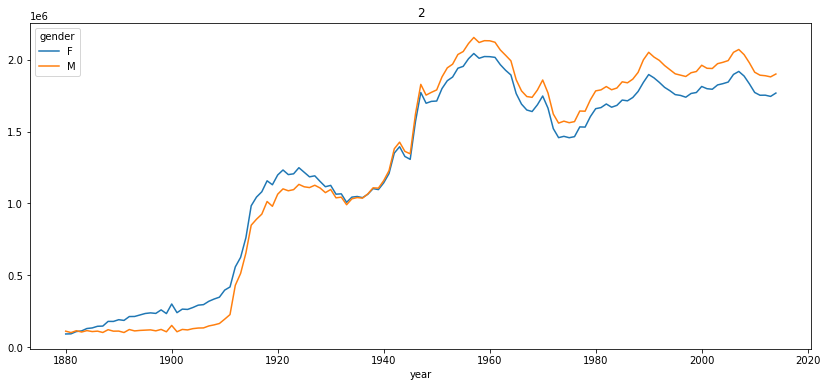

In [77]:
# 그래프의 가로 세로 비율 적용
total_births.plot(title='2')
plt.rcParams['figure.figsize']=(14,6)